In [1]:

# Importing libraries
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
 
%matplotlib inline

In [2]:
## the first and foremost part in any task is knowing about data , lets know about the data 

In [3]:
# Reading the train.csv by removing the
# last column since it's an empty column
data = pd.read_csv("final.csv").dropna(axis = 1)

In [4]:
data.head()

,Unnamed: 0,"conjunctivitis, episodic",dysarthria (less common),narcolepsy,hydrocephalus,abnormal electroretinogram,onychomadesis,adrenocortical carcinomas,"joint pain, swelling, crepitus, and palpable loose bodies",high ratio between sitting height and total height,...,lesions are symmetrical,intramuscular hematomas,glaucoma (75%),butterfly vertebrae,antiretinal antibodies,neonatal muscular hypotonia,hellp syndrome,dysmorphic facial features,progressive osteoarthropathy (early-onset),disease_name
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3-Beta-Hydroxysteroid Dehydrogenase Deficiency
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3-Beta-Hydroxysteroid Dehydrogenase Deficiency
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3-Beta-Hydroxysteroid Dehydrogenase Deficiency
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3-Hydroxyisobutyric Aciduria
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3-Hydroxyisobutyric Aciduria


In [5]:
for col in data.columns:
    print(col)

Unnamed: 0
conjunctivitis, episodic
dysarthria (less common)
narcolepsy
hydrocephalus
abnormal electroretinogram
onychomadesis
adrenocortical carcinomas
joint pain, swelling, crepitus, and palpable loose bodies
high ratio between sitting height and total height
low testosterone level
conjunctival telangiectases
central hypotonia
elevated serum aldosterone
dilated fluid-filled loops of intestine at birth
preserved vision
normal pulmonary vein pressures
bone dysplasia (in some patients)
keratoconus
falciform retinal folds
macrocytosis without anemia
preauricular tag
enchondromata
variable plasma ldl-c levels
convulsions, febrile (in some patients)
a subset of group b patients have absence of pc protein and mrna
vestibulopathy, bilateral, progressive
choroidal atrophy
hair breakage
sleep-onset rem
hemiplegia
anterior open bite
craniofacial asymmetry (in some patients)
intestinal t-cell lymphoma
vertical crease in fourth interdigital space
increased cellular sensitivity to uv light
normal 

In [6]:
data.drop(['Unnamed: 0'], axis = 1, inplace = True) 


In [7]:
data.head()

,"conjunctivitis, episodic",dysarthria (less common),narcolepsy,hydrocephalus,abnormal electroretinogram,onychomadesis,adrenocortical carcinomas,"joint pain, swelling, crepitus, and palpable loose bodies",high ratio between sitting height and total height,low testosterone level,...,lesions are symmetrical,intramuscular hematomas,glaucoma (75%),butterfly vertebrae,antiretinal antibodies,neonatal muscular hypotonia,hellp syndrome,dysmorphic facial features,progressive osteoarthropathy (early-onset),disease_name
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3-Beta-Hydroxysteroid Dehydrogenase Deficiency
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3-Beta-Hydroxysteroid Dehydrogenase Deficiency
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3-Beta-Hydroxysteroid Dehydrogenase Deficiency
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3-Hydroxyisobutyric Aciduria
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3-Hydroxyisobutyric Aciduria


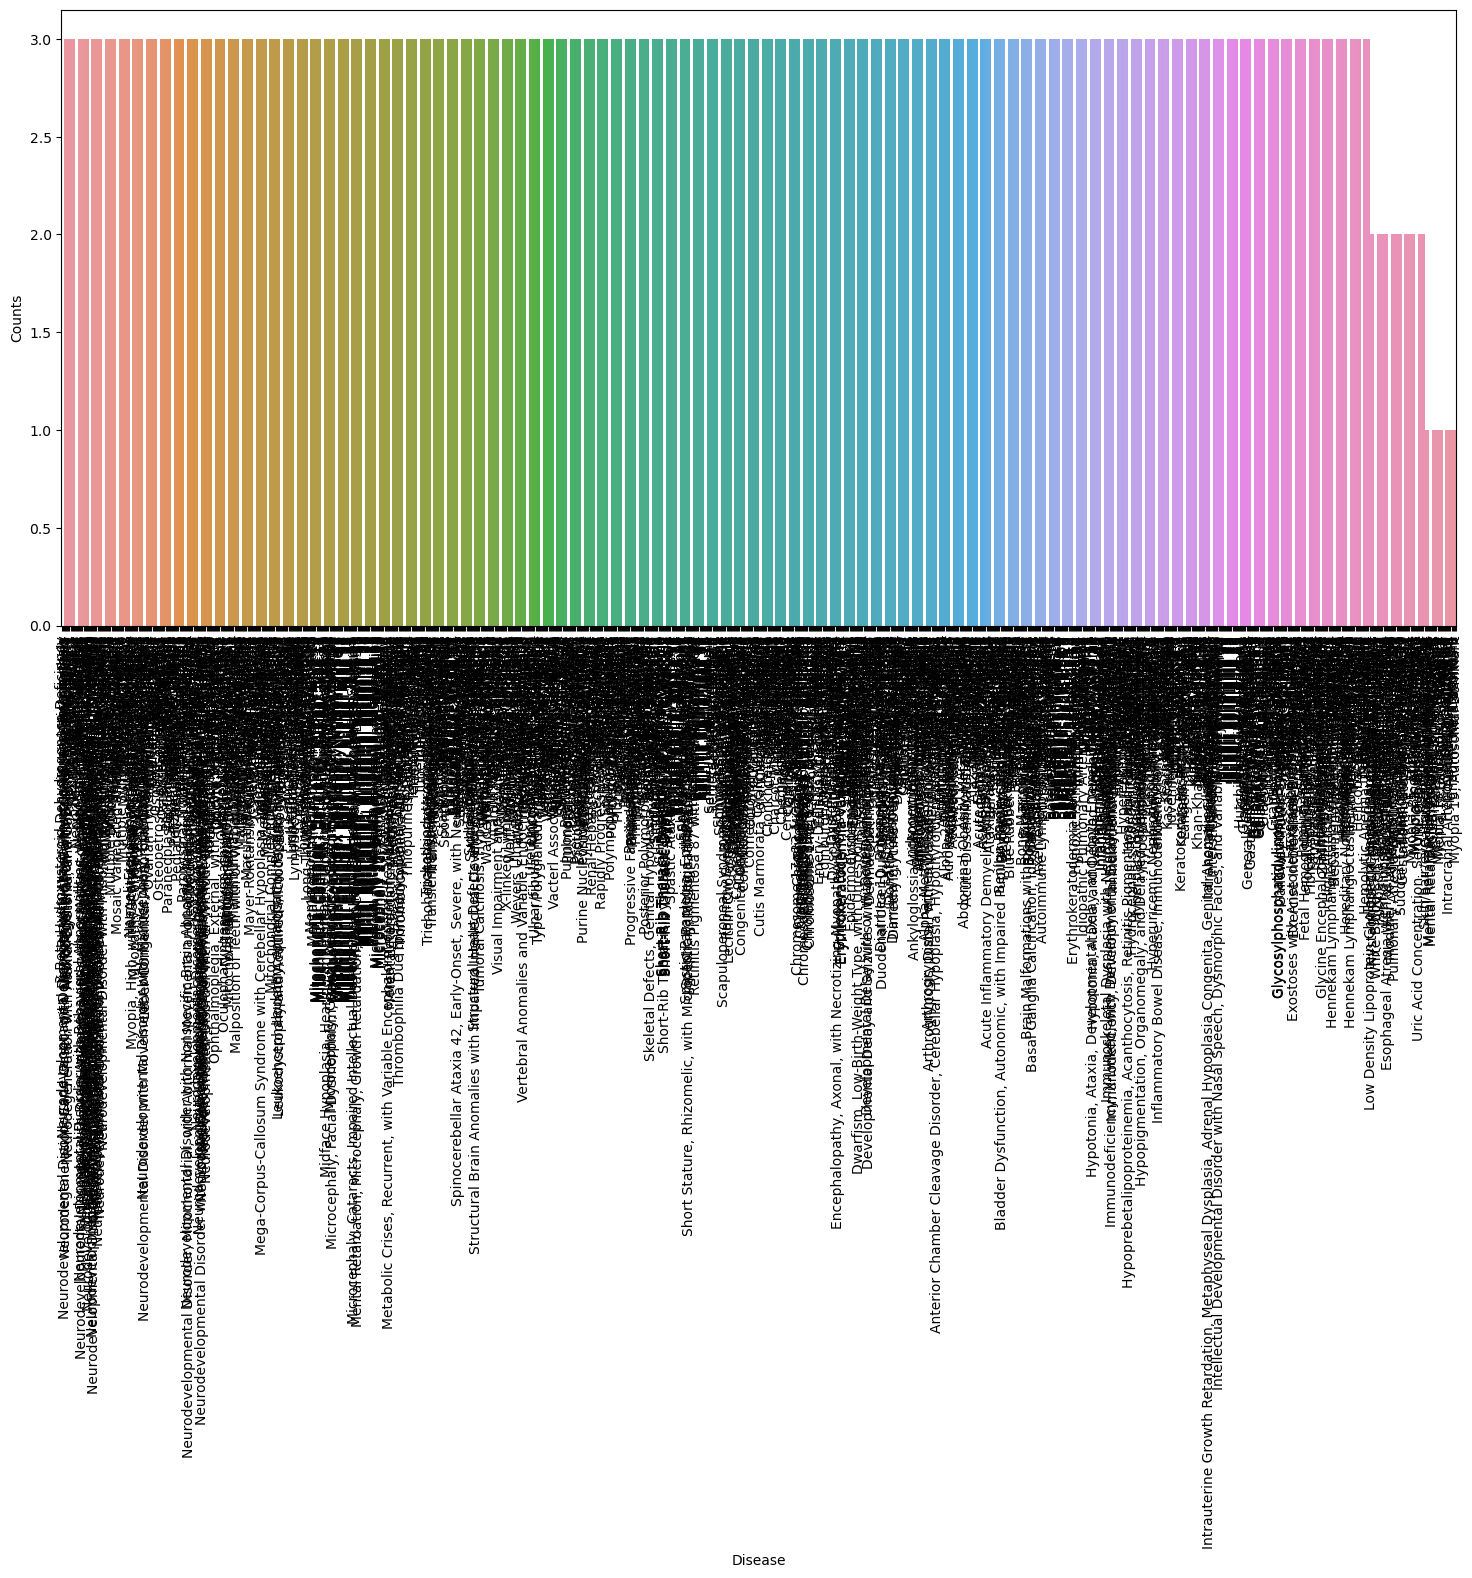

In [8]:
# Checking whether the dataset is balanced or not
disease_counts = data["disease_name"].value_counts()
temp_df = pd.DataFrame({
    "Disease": disease_counts.index,
    "Counts": disease_counts.values
})
 
plt.figure(figsize = (18,8))
sns.barplot(x = "Disease", y = "Counts", data = temp_df)
plt.xticks(rotation=90)
plt.show()

In [9]:

# Encoding the target value into numerical
# value using LabelEncoder
encoder = LabelEncoder()
data["disease_name"] = encoder.fit_transform(data["disease_name"])

In [10]:
X = data.iloc[:,:-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test =train_test_split(
  X, y, test_size = 0.2, random_state = 24)
 
print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")

Train: (3016, 14935), (3016,)
Test: (754, 14935), (754,)


In [11]:
print(X)

      conjunctivitis, episodic  dysarthria (less common)  narcolepsy  \
0                            0                         0           0   
1                            0                         0           0   
2                            0                         0           0   
3                            0                         0           0   
4                            0                         0           0   
...                        ...                       ...         ...   
3765                         0                         0           0   
3766                         0                         0           0   
3767                         0                         0           0   
3768                         0                         0           0   
3769                         0                         0           0   

      hydrocephalus  abnormal electroretinogram  onychomadesis  \
0                 0                           0              0   
1  

In [12]:
print(y)

0          0
1          0
2          0
3          1
4          1
        ... 
3765    1287
3766    1287
3767    1288
3768    1288
3769    1288
Name: disease_name, Length: 3770, dtype: int64


In [13]:
# Defining scoring metric for k-fold cross validation
def cv_scoring(estimator, X, y):
    return accuracy_score(y, estimator.predict(X))
 
# Initializing Models
models = {
    "SVC":SVC(),
    "Gaussian NB":GaussianNB(),
    "Random Forest":RandomForestClassifier(random_state=18)
}
 
# Producing cross validation score for the models
for model_name in models:
    model = models[model_name]
    scores = cross_val_score(model, X, y, cv = 2,
                             n_jobs = -1,
                             scoring = cv_scoring)
    print("=="*30)
    print(model_name)
    print(f"Scores: {scores}")
    print(f"Mean Score: {np.mean(scores)}")

/home/shrishti/miniconda3/envs/ml_prog/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


SVC
Scores: [0.44774536 0.32944297]
Mean Score: 0.3885941644562334


/home/shrishti/miniconda3/envs/ml_prog/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


Gaussian NB
Scores: [0.64137931 0.92785146]
Mean Score: 0.7846153846153846


/home/shrishti/miniconda3/envs/ml_prog/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


Random Forest
Scores: [0.87427056 0.88965517]
Mean Score: 0.8819628647214854


In [14]:

# Training and testing Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
preds = nb_model.predict(X_test)
print(f"Accuracy on train data by Naive Bayes Classifier\
: {accuracy_score(y_train, nb_model.predict(X_train))*100}")
 
print(f"Accuracy on test data by Naive Bayes Classifier\
: {accuracy_score(y_test, preds)*100}")
# cf_matrix = confusion_matrix(y_test, preds)
# plt.figure(figsize=(12,8))
# sns.heatmap(cf_matrix, annot=True)
# plt.title("Confusion Matrix for Naive Bayes Classifier on Test Data")
# plt.show()
 


Accuracy on train data by Naive Bayes Classifier: 98.77320954907162
Accuracy on test data by Naive Bayes Classifier: 77.32095490716179


In [15]:
# Training and testing SVM Classifier
svm_model = SVC()
svm_model.fit(X_train, y_train)
preds = svm_model.predict(X_test)
 
print(f"Accuracy on train data by SVM Classifier\
: {accuracy_score(y_train, svm_model.predict(X_train))*100}")
 
print(f"Accuracy on test data by SVM Classifier\
: {accuracy_score(y_test, preds)*100}")
# cf_matrix = confusion_matrix(y_test, preds)
# plt.figure(figsize=(12,8))
# sns.heatmap(cf_matrix, annot=True)
# plt.title("Confusion Matrix for SVM Classifier on Test Data")
# plt.show()
 
# Training and testing Random Forest Classifier
rf_model = RandomForestClassifier(random_state=18)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)
print(f"Accuracy on train data by Random Forest Classifier\
: {accuracy_score(y_train, rf_model.predict(X_train))*100}")
 
print(f"Accuracy on test data by Random Forest Classifier\
: {accuracy_score(y_test, preds)*100}")
 
# cf_matrix = confusion_matrix(y_test, preds)
# plt.figure(figsize=(12,8))
# sns.heatmap(cf_matrix, annot=True)
# plt.title("Confusion Matrix for Random Forest Classifier on Test Data")
# plt.show()

Accuracy on train data by SVM Classifier: 89.45623342175067
Accuracy on test data by SVM Classifier: 48.01061007957559
Accuracy on train data by Random Forest Classifier: 98.90583554376657
Accuracy on test data by Random Forest Classifier: 82.09549071618038


In [17]:
# Training the models on whole data
final_svm_model = SVC()
final_nb_model = GaussianNB()
final_rf_model = RandomForestClassifier(random_state=18)
final_svm_model.fit(X, y)
final_nb_model.fit(X, y)
final_rf_model.fit(X, y)
 
# Reading the test data
test_data = pd.read_csv("final.csv").dropna(axis=1)


In [18]:
test_data.head()

,Unnamed: 0,"conjunctivitis, episodic",dysarthria (less common),narcolepsy,hydrocephalus,abnormal electroretinogram,onychomadesis,adrenocortical carcinomas,"joint pain, swelling, crepitus, and palpable loose bodies",high ratio between sitting height and total height,...,lesions are symmetrical,intramuscular hematomas,glaucoma (75%),butterfly vertebrae,antiretinal antibodies,neonatal muscular hypotonia,hellp syndrome,dysmorphic facial features,progressive osteoarthropathy (early-onset),disease_name
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3-Beta-Hydroxysteroid Dehydrogenase Deficiency
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3-Beta-Hydroxysteroid Dehydrogenase Deficiency
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3-Beta-Hydroxysteroid Dehydrogenase Deficiency
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3-Hydroxyisobutyric Aciduria
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3-Hydroxyisobutyric Aciduria


In [19]:
test_data.drop(['Unnamed: 0'] , axis = 1 , inplace = True)

In [20]:
test_data.head()

,"conjunctivitis, episodic",dysarthria (less common),narcolepsy,hydrocephalus,abnormal electroretinogram,onychomadesis,adrenocortical carcinomas,"joint pain, swelling, crepitus, and palpable loose bodies",high ratio between sitting height and total height,low testosterone level,...,lesions are symmetrical,intramuscular hematomas,glaucoma (75%),butterfly vertebrae,antiretinal antibodies,neonatal muscular hypotonia,hellp syndrome,dysmorphic facial features,progressive osteoarthropathy (early-onset),disease_name
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3-Beta-Hydroxysteroid Dehydrogenase Deficiency
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3-Beta-Hydroxysteroid Dehydrogenase Deficiency
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3-Beta-Hydroxysteroid Dehydrogenase Deficiency
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3-Hydroxyisobutyric Aciduria
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3-Hydroxyisobutyric Aciduria


In [21]:
X = test_data.iloc[:,:-1]
y = test_data.iloc[:, -1]
train_X, test_X, train_Y, test_Y =train_test_split(
  X, y, test_size = 0.2, random_state = 24)
 
print(f"Train: {train_X.shape}, {train_Y.shape}")
print(f"Test: {test_X.shape}, {test_Y.shape}")

Train: (3016, 14935), (3016,)
Test: (754, 14935), (754,)


In [22]:
 
test_X = test_data.iloc[:, :-1]
test_Y = encoder.transform(test_data.iloc[:, -1])
 
# Making prediction by take mode of predictions
# made by all the classifiers
svm_preds = final_svm_model.predict(test_X)
nb_preds = final_nb_model.predict(test_X)
rf_preds = final_rf_model.predict(test_X)
 
final_preds = [mode([i,j,k])[0][0] for i,j,
               k in zip(svm_preds, nb_preds, rf_preds)]
 
print(f"Accuracy on Test dataset by the combined model\
: {accuracy_score(test_Y, final_preds)*100}")
 
# cf_matrix = confusion_matrix(test_Y, final_preds)
# plt.figure(figsize=(12,8))
 
# sns.heatmap(cf_matrix, annot = True)
# plt.title("Confusion Matrix for Combined Model on Test Dataset")
# plt.show()

Accuracy on Test dataset by the combined model: 98.56763925729443


## Next thing we need to do is taking the symptoms as input and giving out dieses as output 

In [23]:
test = test_data["disease_name"]

In [24]:
symptoms = X.columns.values
 
# Creating a symptom index dictionary to encode the
# input symptoms into numerical form
symptom_index = {}
for index, value in enumerate(symptoms):
    symptom = value
#     symptom = " ".join([i.capitalize() for i in value.split("_")])
    symptom_index[symptom] = index
 
    data_dict = {
    "symptom_index":symptom_index,
    "predictions_classes":encoder.classes_
}
    data_list = []
    data_list.append(data_dict)
  #  print(data_dict)
# print(data_dict)
    
 
 # Defining the Function
# Input: string containing symptoms separated by commmas
# Output: Generated predictions by models
def predictDisease(symptoms):
    symptoms = symptoms.split(" | ")
    # creating input data for the models
    input_data = [0] * len(data_dict["symptom_index"])
   # print(input_data)
    for symptom in symptoms:
        print(symptom)
        
        index = data_dict["symptom_index"][symptom]
        input_data[index] = 1
        
         
    # reshaping the input data and converting it
    # into suitable format for model predictions
    input_data = np.array(input_data).reshape(1,-1)
    # print(input_data)
    # generating individual outputs
    rf_prediction = data_dict["predictions_classes"][final_rf_model.predict(input_data)[0]]
    nb_prediction = data_dict["predictions_classes"][final_nb_model.predict(input_data)[0]]
    svm_prediction = data_dict["predictions_classes"][final_svm_model.predict(input_data)[0]]
     
    # making final prediction by taking mode of all predictions
    final_prediction = mode([rf_prediction, nb_prediction, svm_prediction])[0][0]
    predictions = {
        "rf_model_prediction": rf_prediction,
        "naive_bayes_prediction": nb_prediction,
        "svm_model_prediction": nb_prediction,
        "final_prediction":final_prediction
    }
    return predictions

In [25]:
predictDisease("intellectual disability | mineralocorticoid insufficiency (in 15%) | glucocorticoid insufficiency | adrenocorticotropic hormone (acth)-resistant adrenal insufficiency")

intellectual disability
mineralocorticoid insufficiency (in 15%)
glucocorticoid insufficiency
adrenocorticotropic hormone (acth)-resistant adrenal insufficiency


/home/shrishti/miniconda3/envs/ml_prog/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/shrishti/miniconda3/envs/ml_prog/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/home/shrishti/miniconda3/envs/ml_prog/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


{'rf_model_prediction': 'Abdominal Aortic Aneurysm',
 'naive_bayes_prediction': 'Mental Retardation, X-Linked 105',
 'svm_model_prediction': 'Mental Retardation, X-Linked 105',
 'final_prediction': 'Mental Retardation, X-Linked 105'}

In [26]:
# ataxia | headache | peripheral neuropathy | tinnitus | hearing loss | glioma | meningioma | astrocytoma | ependymoma | vestibular schwannoma (over 90% of patients) 

In [27]:
i = "intellectual disability | mineralocorticoid insufficiency (in 15%) | glucocorticoid insufficiency | adrenocorticotropic hormone (acth)-resistant adrenal insufficiency"
# i = i.split(" | ")
# y = []
# for s in i :
#         s = s.replace(s[0],s[0].lowe())
# #         print(s)
#         y.append(s)
# # print(y)Symtoms
# y = ",".join(y)
print(y)

0       3-Beta-Hydroxysteroid Dehydrogenase Deficiency
1       3-Beta-Hydroxysteroid Dehydrogenase Deficiency
2       3-Beta-Hydroxysteroid Dehydrogenase Deficiency
3                         3-Hydroxyisobutyric Aciduria
4                         3-Hydroxyisobutyric Aciduria
                             ...                      
3765                             Xeroderma Pigmentosum
3766                             Xeroderma Pigmentosum
3767                      Zimmermann-Laband Syndrome 3
3768                      Zimmermann-Laband Syndrome 3
3769                      Zimmermann-Laband Syndrome 3
Name: disease_name, Length: 3770, dtype: object


In [28]:
i = "acth-independent hypercortisolemia | enlarged adrenal glands | cognitive decline | increased serum cortisol | cortisol does not decrease on dexamethasone suppression test | decreased serum acth | hypoglycemia | recurrent fever | salt-wasting | adrenogenital syndrome | virilization | gynecomastia in adults | masculinized females | testicular tumors in adults | accelerated | 21-hydroxylase deficiency | micropenis | bifid scrotum | hypospadias | ambiguous genitalia | absent scrotum | clitoris-like phallus | premature pubarche | elevated baseline 17-hydroxypregnenolone levels | elevated acth-stimulated 17-hydroxypregnenolone levels | elevated acth-stimulated 17-hydroxypregnenolone to cortisol ratios | elevated dehydroepiandrosterone (dhea, in some patients) | salt-wasting disorder (in some patients) | kyphosis | osteoporosis | decreased bone mineral density | round face | thin skin | easy bruising | striae | muscle wasting | no progression to cancer | hypertension | anxiety | psychosis | agitation | mood changes"

In [29]:
i = "glucocorticoid insufficiency | generalized dilating diathesis | abdominal aortic aneurysm | muscle weakness | dysarthria | ataxia | hyperreflexia | mineralocorticoid insufficiency (in 15%) | abnormal sweating due to autonomic dysfunction | adrenocorticotropic hormone (acth)-resistant adrenal insufficiency | abnormal cardiovascular reflexes due to autonomic dysfunction | motor axonal neuropathy | short stature | microcephaly | schirmer test shows alacrima | distal muscle weakness and atrophy | estimated 11.6-fold increase among persons with an affected first-degree relative | hyperkeratosis of the palms and soles | hyperpigmentation | achalasia | anisocoria due to autonomic dysfunction | alacrima | optic atrophy | abnormal sweating | postural hypotension | abnormal visual evoked potentials | extensor plantar responses | autonomic dysfunction | mental retardation | developmental delay | anisocoria"

In [30]:
j = "bilateral deafness | neonatal fatal intestinal dysfunction | macrosomia | black lock at temporal occipital region | defective intestinal innervation | aganglionosis of the large intestine and total absence of neurocytes and nerve fibers in the small intestine | abnormal brainstem auditory-evoked potentials | poor head control | developmental delay, profound | edematous hands and feet (1 patient) | reduced activity of mitochondrial respiratory chains (1 family) | dysmorphic features described in 1 patient | microcephaly, progressive | increased csf lactate | poor sucking | dysconjugate eye movements | apneic episodes | increased relative head circumference | tall vertebral bodies"

In [31]:
k = "acetylcholinesterase staining reveals nerve trunk hypertrophy | short-limb dysplasia | long fibulae | seizures | hydrocephalus | central apnea | developmental delay | thin corpus callosum | mental retardation, moderate to profound | limited language acquisition | frontal bossing | midface hypoplasia | sleep apnea | respiratory compromise at birth | otitis media | hearing loss, mild-to-moderate | rhizomelia | mesomelia | anterior bowing of femora | posterior bowing of tibiae | pulmonary hypertension (in some patients)"

In [32]:
i = "ataxia | headache | peripheral neuropathy | tinnitus | hearing loss | glioma | meningioma | astrocytoma | ependymoma | vestibular schwannoma (over 90% of patients) | neurofibroma | retinal hamartoma | juvenile posterior subcapsular lenticular opacities | juvenile cortical cataract | epiretinal membranes | no lisch nodules | schwannoma | occasional cafe-au-lait spots | occasional neurofibroma"

In [33]:
i = "cervicothoracic vertebral defects (especially c5-t1) | vas deferens aplasia | azoospermia | complete absence of all toenails | complete absence of all fingernails (anonychia), congenital | single-multiple round-oval areas of alopecia in parietal area | terminal transverse defects, asymmetric (minimal to absence of a limb) | imperforate vaginal hymen | poland sequence | vascular malformations | pulmonary hypertension"

In [34]:
predictDisease(i)

cervicothoracic vertebral defects (especially c5-t1)
vas deferens aplasia
azoospermia
complete absence of all toenails
complete absence of all fingernails (anonychia), congenital
single-multiple round-oval areas of alopecia in parietal area
terminal transverse defects, asymmetric (minimal to absence of a limb)
imperforate vaginal hymen
poland sequence
vascular malformations
pulmonary hypertension


/home/shrishti/miniconda3/envs/ml_prog/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/shrishti/miniconda3/envs/ml_prog/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/home/shrishti/miniconda3/envs/ml_prog/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


{'rf_model_prediction': 'Acquired Partial Lipodystrophy',
 'naive_bayes_prediction': 'Acquired Partial Lipodystrophy',
 'svm_model_prediction': 'Acquired Partial Lipodystrophy',
 'final_prediction': 'Acquired Partial Lipodystrophy'}

In [35]:
j = "cervicothoracic vertebral defects (especially c5-t1) | vas deferens aplasia | azoospermia"

In [36]:
predictDisease(j)

cervicothoracic vertebral defects (especially c5-t1)
vas deferens aplasia
azoospermia


/home/shrishti/miniconda3/envs/ml_prog/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/shrishti/miniconda3/envs/ml_prog/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/home/shrishti/miniconda3/envs/ml_prog/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


{'rf_model_prediction': 'Acquired Partial Lipodystrophy',
 'naive_bayes_prediction': 'Ainhum',
 'svm_model_prediction': 'Ainhum',
 'final_prediction': 'Acquired Partial Lipodystrophy'}

In [37]:
k = "absence seizures | generalized tonic-clonic seizures (gtcs) | gtcs on awakening"

In [38]:
predictDisease(k)

absence seizures
generalized tonic-clonic seizures (gtcs)
gtcs on awakening


/home/shrishti/miniconda3/envs/ml_prog/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/shrishti/miniconda3/envs/ml_prog/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/home/shrishti/miniconda3/envs/ml_prog/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


{'rf_model_prediction': 'Absence Seizures',
 'naive_bayes_prediction': 'Absence Seizures',
 'svm_model_prediction': 'Absence Seizures',
 'final_prediction': 'Absence Seizures'}

In [39]:
l = "glucocorticoid insufficiency | generalized dilating diathesis | abdominal aortic aneurysm"

In [40]:
predictDisease(l)

glucocorticoid insufficiency
generalized dilating diathesis
abdominal aortic aneurysm


/home/shrishti/miniconda3/envs/ml_prog/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/shrishti/miniconda3/envs/ml_prog/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/home/shrishti/miniconda3/envs/ml_prog/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


{'rf_model_prediction': 'Abdominal Aortic Aneurysm',
 'naive_bayes_prediction': 'Ainhum',
 'svm_model_prediction': 'Ainhum',
 'final_prediction': 'Abdominal Aortic Aneurysm'}

In [41]:
m = "acth-independent hypercortisolemia | enlarged adrenal glands | cognitive decline | increased serum cortisol"
predictDisease(m)

acth-independent hypercortisolemia
enlarged adrenal glands
cognitive decline
increased serum cortisol


/home/shrishti/miniconda3/envs/ml_prog/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/shrishti/miniconda3/envs/ml_prog/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/home/shrishti/miniconda3/envs/ml_prog/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


{'rf_model_prediction': '3-Beta-Hydroxysteroid Dehydrogenase Deficiency',
 'naive_bayes_prediction': 'Ainhum',
 'svm_model_prediction': 'Ainhum',
 'final_prediction': '3-Beta-Hydroxysteroid Dehydrogenase Deficiency'}

In [42]:
n = "acth-independent hypercortisolemia | enlarged adrenal glands | cognitive decline | increased serum cortisol | cortisol does not decrease on dexamethasone suppression test"
predictDisease(n)

acth-independent hypercortisolemia
enlarged adrenal glands
cognitive decline
increased serum cortisol
cortisol does not decrease on dexamethasone suppression test


/home/shrishti/miniconda3/envs/ml_prog/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/shrishti/miniconda3/envs/ml_prog/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/home/shrishti/miniconda3/envs/ml_prog/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


{'rf_model_prediction': '3-Beta-Hydroxysteroid Dehydrogenase Deficiency',
 'naive_bayes_prediction': 'Ainhum',
 'svm_model_prediction': 'Ainhum',
 'final_prediction': '3-Beta-Hydroxysteroid Dehydrogenase Deficiency'}

In [ ]:
p = "acth-independent hypercortisolemia | enlarged adrenal glands | cognitive decline | increased serum cortisol | cortisol does not decrease on dexamethasone suppression test | decreased serum acth"
predictDisease(p)

In [ ]:
r = "acth-independent hypercortisolemia | enlarged adrenal glands | cognitive decline | increased serum cortisol | cortisol does not decrease on dexamethasone suppression test | decreased serum acth | hypoglycemia"
predictDisease(r)

In [ ]:
s = "acth-independent hypercortisolemia | enlarged adrenal glands | cognitive decline | increased serum cortisol | cortisol does not decrease on dexamethasone suppression test | decreased serum acth | hypoglycemia | recurrent fever | salt-wasting"
predictDisease(s)

In [ ]:
a = "acth-independent hypercortisolemia | enlarged adrenal glands | cognitive decline | increased serum cortisol | cortisol does not decrease on dexamethasone suppression test | decreased serum acth | hypoglycemia | recurrent fever | salt-wasting | adrenogenital syndrome | virilization | gynecomastia in adults | masculinized females | testicular tumors in adults | accelerated | 21-hydroxylase deficiency | micropenis | bifid scrotum | hypospadias | ambiguous genitalia | absent scrotum | clitoris-like phallus"
predictDisease(a)

In [ ]:
b = "type 2 diabetes mellitus (t2d) | elevated fasting blood glucose | markedly elevated triglycerides | low high-density lipoprotein (hdl)"
predictDisease(b)

In [ ]:
c = "bilateral deafness | neonatal fatal intestinal dysfunction | macrosomia | black lock at temporal occipital region | defective intestinal innervation"
predictDisease(c)

In [ ]:
d = "bilateral deafness | neonatal fatal intestinal dysfunction | macrosomia"
predictDisease(d)

In [ ]:
e = "dysphagia | synophrys, partial (1 patient) | esotropia (1 patient)"
predictDisease(e)

In [ ]:
f = "dysphagia | synophrys, partial (1 patient) | esotropia (1 patient)"
predictDisease(f)

In [ ]:
a = "acth-independent hypercortisolemia | enlarged adrenal glands | cognitive decline | increased serum cortisol | cortisol does not decrease on dexamethasone suppression test | decreased serum acth | hypoglycemia | recurrent fever | salt-wasting | adrenogenital syndrome | virilization | gynecomastia in adults | masculinized females | testicular tumors in adults | accelerated | 21-hydroxylase deficiency | micropenis | bifid scrotum | hypospadias | ambiguous genitalia | absent scrotum | clitoris-like phallus"
predictDisease(a)

In [ ]:
g = "acth-independent hypercortisolemia | cognitive decline | enlarged adrenal glands | increased serum cortisol | absent scrotum | clitoris-like phallus"
predictDisease(g)

In [ ]:
h = "increased serum cortisol | dysphagia | low free carnitine | elevated fasting blood glucose | macrosomia | type 2 diabetes mellitus (t2d)"
predictDisease(h)